# xgboost

In [1]:
import numpy as np
import pandas as pd
import gc
import pickle
import time

from xgboost import XGBRegressor

In [2]:
data = pd.read_pickle('matrix.pkl')

In [4]:
data = data[[
    'item_cnt_month',
    'date_block_num', 
    'item_id', 
    'shop_id', 
    'city_code',
    'item_category_id', 
    'type_code', 
    'subtype_code', 
    'item_cnt_month_lag_1',
    'item_cnt_month_lag_2', 
    'item_cnt_month_lag_3',
    #'item_cnt_month_lag_4',
    'item_cnt_month_lag_6',
    'item_cnt_month_lag_12', 
    #'orders_lag_1', 
    #'orders_lag_2', 
    #'orders_lag_3',
    #'revenue_lag_1', 
    #'revenue_lag_2', 
    #'revenue_lag_3',
    'date_avg_item_cnt_lag_1',
    #'date_avg_orders_lag_1',
    #'date_avg_revenue_lag_1', 
    'date_item_avg_item_cnt_lag_1',
    'date_item_avg_item_cnt_lag_2', 
    'date_item_avg_item_cnt_lag_3',
    'date_item_avg_item_cnt_lag_4',
    'date_item_avg_item_cnt_lag_6', 
    'date_item_avg_item_cnt_lag_12',
    #'date_item_sum_orders_lag_1', 
    #'date_item_sum_orders_lag_2',
    #'date_item_sum_orders_lag_3',
    #'date_item_sum_orders_lag_4',
    #'date_item_sum_orders_lag_6',
    #'date_item_sum_orders_lag_12', 
    'date_shop_avg_item_cnt_lag_1',
    'date_shop_avg_item_cnt_lag_2',
    'date_shop_avg_item_cnt_lag_3',
    'date_shop_avg_item_cnt_lag_4',
    'date_shop_avg_item_cnt_lag_6',
    'date_shop_avg_item_cnt_lag_12',
    #'date_shop_sum_orders_lag_1',
    #'date_shop_sum_orders_lag_2',
    #'date_shop_sum_orders_lag_3', 
    #'date_shop_sum_orders_lag_4', 
    #'date_shop_sum_orders_lag_6',
    #'date_shop_sum_orders_lag_12', 
    'date_cat_avg_item_cnt_lag_1',
    #'date_cat_sum_orders_lag_1', 
    'date_shop_cat_avg_item_cnt_lag_1',
    #'date_shop_cat_sum_orders_lag_1',
    'date_city_avg_item_cnt_lag_1',
    #'date_city_sum_orders_lag_1', 
    'date_item_city_avg_item_cnt_lag_1',
    #'date_item_city_sum_orders_lag_1', 
    'date_type_avg_item_cnt_lag_1',
    #'date_type_sum_orders_lag_1',
    'date_subtype_avg_item_cnt_lag_1',
    #'date_subtype_sum_orders_lag_1', 
    'delta_price_lag',
    'delta_revenue_lag',
    'month',
    'days',
    'item_shop_last_sale',
    'item_last_sale', 
    'item_shop_first_sale',
    'item_first_sale', 
    #'tfidf_1',
    #'tfidf_2',
    #'tfidf_3',
    #'tfidf_4',
    #'tfidf_5', 
    #'tfidf_6', 
    #'tfidf_7',
    #'tfidf_8', 
    #'tfidf_9',
    #'tfidf_10',
    #'tfidf_11',
    #'tfidf_12'
]]
data.info()

In [5]:
X_train = data[data.date_block_num < 33].drop(['item_cnt_month'], axis=1)
Y_train = data[data.date_block_num < 33]['item_cnt_month']
X_valid = data[data.date_block_num == 33].drop(['item_cnt_month'], axis=1)
Y_valid = data[data.date_block_num == 33]['item_cnt_month']
X_test = data[data.date_block_num == 34].drop(['item_cnt_month'], axis=1)

In [6]:
del data
gc.collect();

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, eta=0.15, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=500, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=42, silent=True, subsample=0.8)

In [7]:
ts = time.time()

model = XGBRegressor(
    max_depth=8,
    min_child_weight=500, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.15,
    seed=42)

model.fit(
    X_train, 
    Y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, Y_train), (X_valid, Y_valid)], 
    verbose=True, 
    early_stopping_rounds = 10)

time.time() - ts

[0]	validation_0-rmse:1.15267	validation_1-rmse:1.11844
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:1.10625	validation_1-rmse:1.08111
[2]	validation_0-rmse:1.06577	validation_1-rmse:1.05061
[3]	validation_0-rmse:1.03237	validation_1-rmse:1.02552
[4]	validation_0-rmse:1.00489	validation_1-rmse:1.00638
[5]	validation_0-rmse:0.979867	validation_1-rmse:0.988886
[6]	validation_0-rmse:0.959373	validation_1-rmse:0.974656
[7]	validation_0-rmse:0.940499	validation_1-rmse:0.960506
[8]	validation_0-rmse:0.926032	validation_1-rmse:0.951736
[9]	validation_0-rmse:0.913177	validation_1-rmse:0.943634
[10]	validation_0-rmse:0.903017	validation_1-rmse:0.937709
[11]	validation_0-rmse:0.893306	validation_1-rmse:0.93233
[12]	validation_0-rmse:0.885364	validation_1-rmse:0.92773
[13]	validation_0-rmse:0.878163	validation_1-rmse:0.924248
[14]	validation_0-rmse:0.872012	valid

1192.1447689533234

In [8]:
# model = pickle.load(open('xgb_model.pickle', 'rb'))

In [9]:
Y_pred = model.predict(X_valid).clip(0, 20)
Y_test = model.predict(X_test).clip(0, 20)

In [10]:
pickle.dump(model, open('xgb_model.pickle', 'wb'))
pickle.dump(Y_pred, open('xgb_train.pickle', 'wb'))
pickle.dump(Y_test, open('xgb_test.pickle', 'wb'))

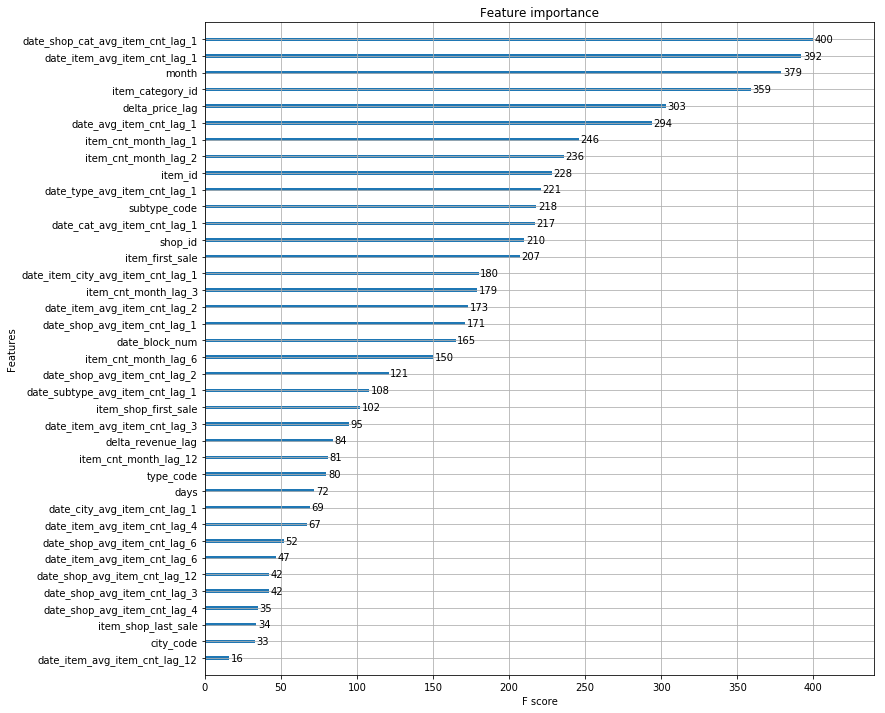

In [11]:
from xgboost import plot_importance

import matplotlib.pyplot as plt
%matplotlib inline

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

plot_features(model, (12,12))

In [12]:
test = pd.read_csv('test.csv.gz', compression='gzip').set_index('ID')
submission = pd.DataFrame({
    "ID": test.index, 
    "item_cnt_month": Y_test
})
submission.to_csv('xgb_submission.csv', index=False)

LB: 0.91233